In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ibm_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\IBM_weekly.csv', sep = ',',header = 0)

ibm_df_tradingview=pd.read_csv(r'C:\Users\Gian\Downloads\BATS IBM, 1W.csv')

In [3]:
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'], format = '%Y-%m-%d')
ibm_df_tradingview[ 'time']=pd.to_datetime(ibm_df_tradingview['time'], format = '%Y-%m-%d')
ibm_df_tradingview['time'] += pd.Timedelta(days=6)
ibm_df_tradingview=ibm_df_tradingview[(ibm_df_tradingview['time']>=pd.to_datetime('1994-03-06')) & (ibm_df_tradingview['time']<=pd.to_datetime('2024-03-03'))]
ibm_df_tradingview.reset_index(drop=True, inplace=True)

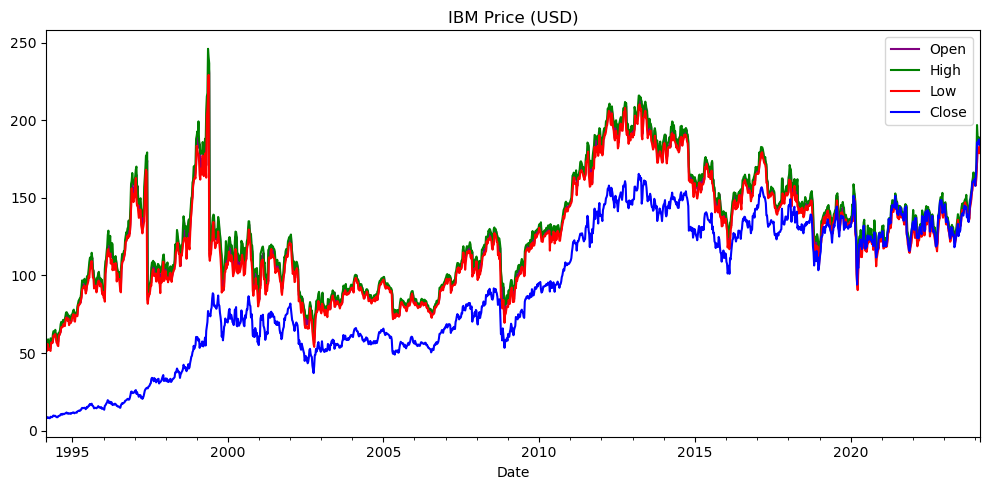

In [4]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [5]:
ibm_df.tail(10)

,Date,Open,High,Low,Close,Volume
1556,2023-12-31,162.23,164.180,162.05,162.0724,9603900
1557,2024-01-07,162.83,163.290,158.67,157.7221,15322500
1558,2024-01-14,158.69,165.980,157.89,164.3021,17641300
1559,2024-01-21,165.80,171.580,165.04,169.9308,19860900
1560,2024-01-28,172.82,196.900,172.40,185.7268,57499400
1561,2024-02-04,187.46,189.460,182.71,184.1115,28282700
1562,2024-02-11,185.51,187.180,181.49,186.3400,22784812
1563,2024-02-18,185.90,188.950,182.26,187.6400,21745006
1564,2024-02-25,187.64,188.770,178.75,185.7200,17487852
1565,2024-03-03,185.60,186.125,184.06,184.1300,4620815


In [6]:
ibm_df_tradingview.tail(10)

,time,open,high,low,close
1556,2024-01-01,162.23,164.1800,162.050,163.55
1557,2024-01-08,162.83,163.2900,158.670,159.16
1558,2024-01-14,158.69,165.9800,157.885,165.80
1559,2024-01-22,165.80,171.5791,165.040,171.48
1560,2024-01-28,172.82,196.9000,172.400,187.42
1561,2024-02-04,187.46,189.4600,182.710,185.79
1562,2024-02-11,185.51,187.1800,181.490,186.34
1563,2024-02-18,185.90,188.9500,182.260,187.64
1564,2024-02-26,187.64,188.7700,178.750,185.72
1565,2024-03-03,185.60,188.3800,182.620,188.20


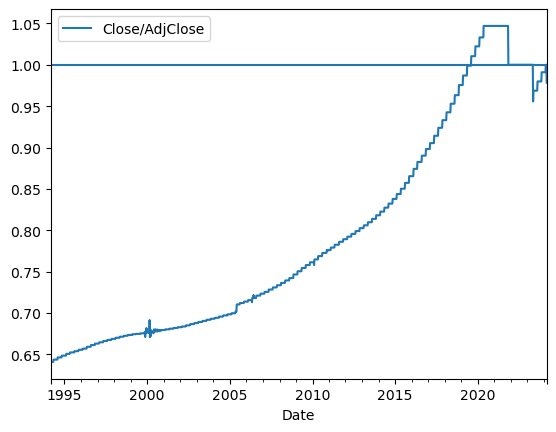

In [7]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=ibm_df['Date']
ratio_close['Close/AdjClose']=ibm_df['Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

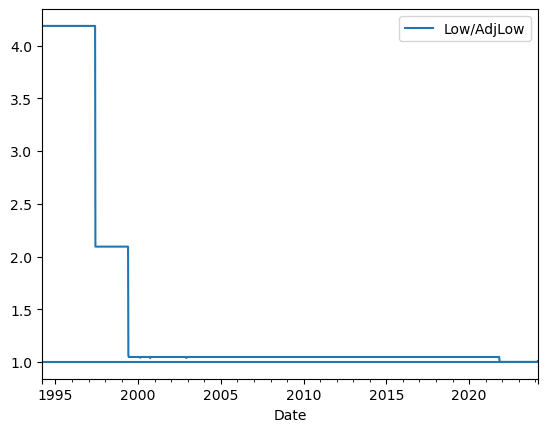

In [8]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=ibm_df['Date']
ratio_close['Low/AdjLow']=ibm_df['Low']/ibm_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

In [9]:
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/=1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/=2
ibm_df.loc[ibm_df['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/=2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/=2
ibm_df.loc[ibm_df['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/=2

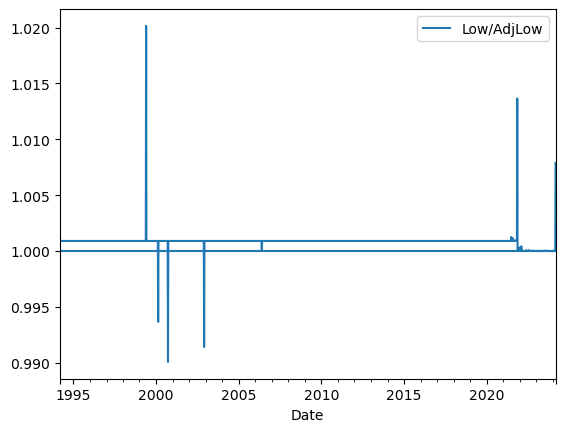

In [10]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=ibm_df['Date']
ratio_close['Low/AdjLow']=ibm_df['Low']/ibm_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

In [11]:
dividend_df=pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Dividend data\ibm_dividends.csv', sep=';')

In [12]:
dividend_df

,Ex/EFF Date,Type,Cash Amount,Declaration Date,Record Date,Payment Date
0,02/08/2024,Cash,$1.66,01/30/2024,02/09/2024,03/09/2024
1,11/09/2023,Cash,$1.66,10/30/2023,11/10/2023,12/09/2023
2,08/09/2023,Cash,$1.66,07/24/2023,08/10/2023,09/09/2023
3,05/09/2023,Cash,$1.66,04/25/2023,05/10/2023,06/10/2023
4,02/09/2023,Cash,$1.65,01/31/2023,02/10/2023,03/10/2023
...,...,...,...,...,...,...
110,05/08/1996,Cash,$0.35,04/17/1996,05/10/1996,06/10/1996
111,02/07/1996,Cash,$0.25,01/30/1996,02/09/1996,03/09/1996
112,11/08/1995,Cash,$0.25,10/30/1995,11/10/1995,12/09/1995
113,08/08/1995,Cash,$0.25,07/25/1995,08/10/1995,09/09/1995


In [13]:
ibm_df

,Date,Open,High,Low,Close,Volume
0,1994-03-06,12.697180,12.876434,12.458174,8.0537,9055900
1,1994-03-13,12.667304,13.444073,12.278920,8.5512,14884100
2,1994-03-20,13.414197,13.951960,13.354446,8.7424,12402200
3,1994-03-27,13.593451,14.071463,12.816683,8.2642,12237600
4,1994-04-03,12.995937,13.145315,12.428298,8.3599,14114100
...,...,...,...,...,...,...
1561,2024-02-04,187.460000,189.460000,182.710000,184.1115,28282700
1562,2024-02-11,185.510000,187.180000,181.490000,186.3400,22784812
1563,2024-02-18,185.900000,188.950000,182.260000,187.6400,21745006
1564,2024-02-25,187.640000,188.770000,178.750000,185.7200,17487852


In [14]:
dividend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ex/EFF Date       115 non-null    object
 1   Type              115 non-null    object
 2   Cash Amount       115 non-null    object
 3   Declaration Date  115 non-null    object
 4   Record Date       115 non-null    object
 5   Payment Date      115 non-null    object
dtypes: object(6)
memory usage: 5.5+ KB


In [15]:
# Ensure 'Date' columns are in datetime format and sort by date
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'])
ibm_df.sort_values('Date', inplace=True)
dividend_df['Ex/EFF Date'] = pd.to_datetime(dividend_df['Ex/EFF Date'])

# Ensure 'Cash Amount' is a float and remove the dollar sign
dividend_df['Cash Amount'] = dividend_df['Cash Amount'].replace('[\$,]', '', regex=True).astype(float)

# Iterate through each dividend payment
for index, row in dividend_df.iterrows():
    # Find the closing price of the day before the ex-dividend date
    close_price_day_before = ibm_df.loc[ibm_df['Date'] < row['Ex/EFF Date'], 'Close'].iloc[-1]

    # Calculate the adjustment factor
    adjustment_factor = (close_price_day_before - row['Cash Amount']) / close_price_day_before

    # Apply the adjustment factor to all historical prices prior to the ex-dividend date
    ibm_df.loc[ibm_df['Date'] < row['Ex/EFF Date'], 'Close'] *= adjustment_factor

# The 'Close' column is now adjusted and can be used for analysis

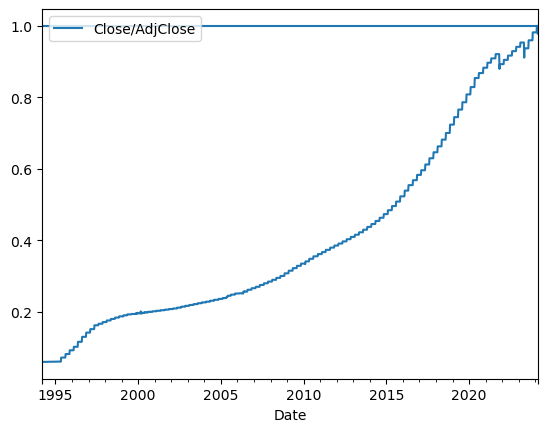

In [16]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=ibm_df['Date']
ratio_close['Close/AdjClose']=ibm_df['Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

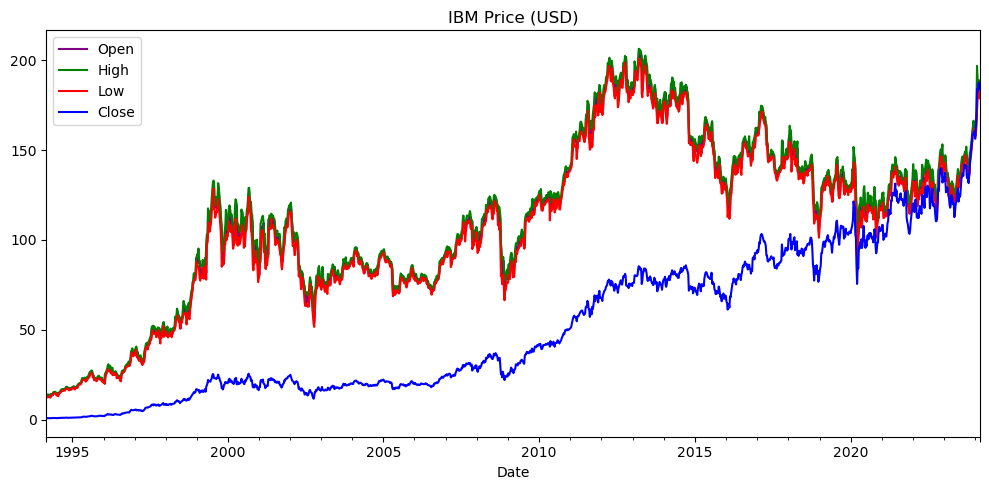

In [17]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()